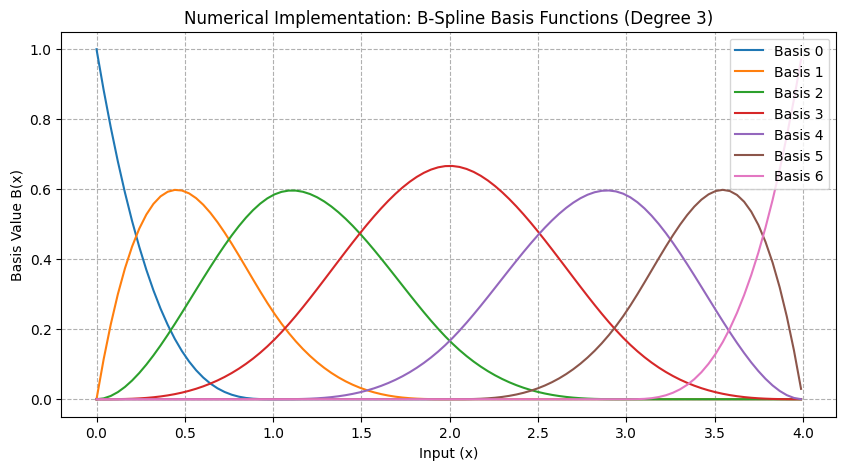

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def b_spline_basis(x, i, k, knots):
    """
    Numerical implementation of Cox-de Boor recursion.
    x: input value
    i: index of the basis function
    k: degree of the spline
    knots: the knot vector
    """
    if k == 0:
        return 1.0 if knots[i] <= x < knots[i+1] else 0.0
    
    # Calculate weights to blend lower-degree bases
    denom1 = knots[i+k] - knots[i]
    denom2 = knots[i+k+1] - knots[i+1]
    
    term1 = 0
    if denom1 != 0:
        term1 = ((x - knots[i]) / denom1) * b_spline_basis(x, i, k-1, knots)
        
    term2 = 0
    if denom2 != 0:
        term2 = ((knots[i+k+1] - x) / denom2) * b_spline_basis(x, i+1, k-1, knots)
        
    return term1 + term2


degree = 3
knot_vector = [0, 0, 0, 0, 1, 2, 3, 4, 4, 4, 4] # Clamped knots
x_vals = np.linspace(0, 3.99, 100)

# Generate the Basis Functions (The "Bumps")
plt.figure(figsize=(10, 5))
for i in range(len(knot_vector) - degree - 1):
    y_vals = [b_spline_basis(x, i, degree, knot_vector) for x in x_vals]
    plt.plot(x_vals, y_vals, label=f"Basis {i}")

plt.title(f"Numerical Implementation: B-Spline Basis Functions (Degree {degree})")
plt.xlabel("Input (x)")
plt.ylabel("Basis Value B(x)")
plt.legend()
plt.grid(True, linestyle='--')
plt.show()